In [1]:
library(ggvenn)
library(tidyverse)
library(RColorBrewer)

# Custom package
library(rutils)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: ggplot2

-- Attaching packages -------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.6     v purrr   0.3.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ----------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("CESC", "UCS", "UCEC")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
matrisome_path <- paste0(dirs$data_dir, "/matrisome/matrisome_hs_masterlist.tsv")

In [4]:
dge_m_files <- paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets, "_dge_m_gene_list.txt")
univar_figo_files <- paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets, "_figo_univar_gene_list.txt")
network_figo_files <- paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets, "_figo_network_hub_thresh_", hub_con_thresh, "_gene_list.txt")

In [3]:
dset_idx <- 3
hub_con_thresh <- 0.5
# hub_con_thresh <- 0.25
fig_h <- 6
fig_w <- fig_h

In [11]:
dge_m_lists <- list()
univar_figo_lists <- list()
network_figo_lists <- list()

for (i in 1:3) {
    dge_m_lists[[unified_dsets[i]]] <- read_lines(dge_m_files[i])
    univar_figo_lists[[unified_dsets[i]]] <- read_lines(univar_figo_files[i])
    network_figo_lists[[unified_dsets[i]]] <- read_lines(network_figo_files[i])
}
matrisome_df <- load_matrisome_df(matrisome_path)


-- Column specification -------------------------------------------------------------------------------------------------------------------------------------------------
cols(
  Division = col_character(),
  Category = col_character(),
  `Gene Symbol` = col_character(),
  `Gene Name` = col_character(),
  Synonyms = col_character(),
  HGNC_IDs = col_double(),
  `HGNC_IDs Links` = col_double(),
  UniProt_IDs = col_character(),
  Refseq_IDs = col_character(),
  Orthology = col_character(),
  Notes = col_character()
)




In [44]:
venn_df <- tibble(geneID = matrisome_df$gene_symbol) %>%
    # DEMGs
    dplyr::mutate(cesc_demg = geneID %in% dge_m_lists$unified_cervical_data) %>%
    dplyr::mutate(ucs_demg = geneID %in% dge_m_lists$unified_uterine_data) %>%
    dplyr::mutate(ucec_demg = geneID %in% dge_m_lists$unified_uterine_endometrial_data) %>%
    # Univar
    dplyr::mutate(cesc_univar = geneID %in% univar_figo_lists$unified_cervical_data) %>%
    dplyr::mutate(ucs_univar = geneID %in% univar_figo_lists$unified_uterine_data) %>%
    dplyr::mutate(ucec_univar = geneID %in% univar_figo_lists$unified_uterine_endometrial_data) %>%
    # Network
    dplyr::mutate(cesc_network = geneID %in% network_figo_lists$unified_cervical_data) %>%
    dplyr::mutate(ucs_network = geneID %in% network_figo_lists$unified_uterine_data) %>%
    dplyr::mutate(ucec_network = geneID %in% network_figo_lists$unified_uterine_endometrial_data)

In [45]:
venn_pal <- brewer.pal(n = 3, name = "Set2")
# venn_pal <- c("#F8766D", "#00BA38", "#619CFF")
label_size = 16

In [46]:
make_inter_venn <- function (df, map, title = "") {
    ggplot(data = df) +
        geom_venn(
#             aes_string(A = cesc, B = ucs, C = ucec),
            map,
            fill_color = venn_pal,
            fill_alpha = 0.7,
            set_names = c("CESC", "UCS", "UCEC"),
            show_percentage = TRUE
        ) +
        theme_void() +
        labs(title = title) +
        theme(
            plot.title = element_text(face = "bold", size = label_size)
        )
}

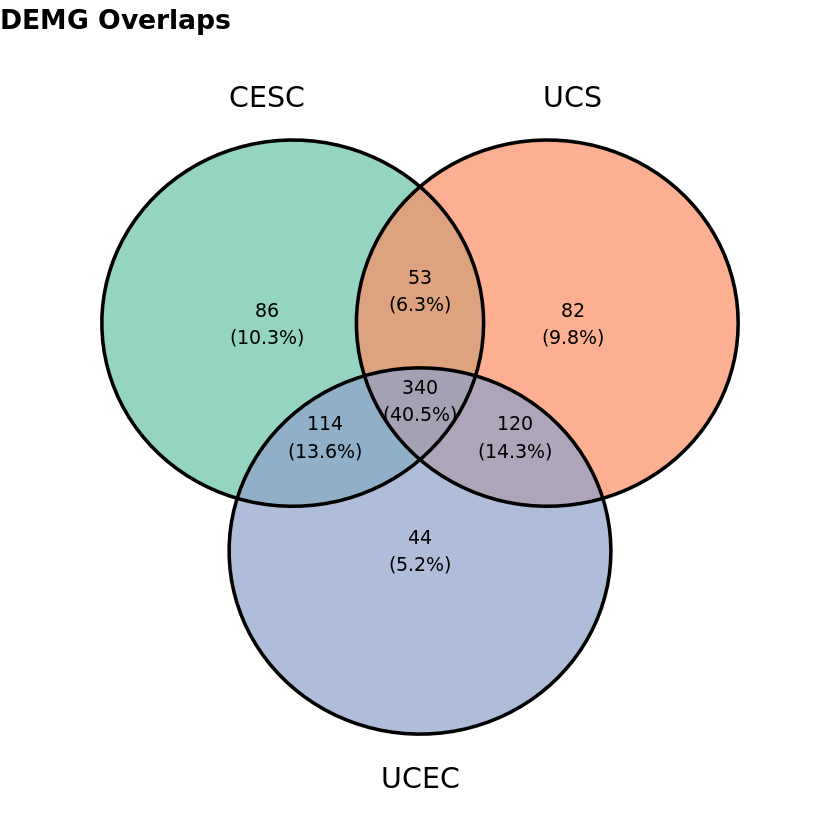

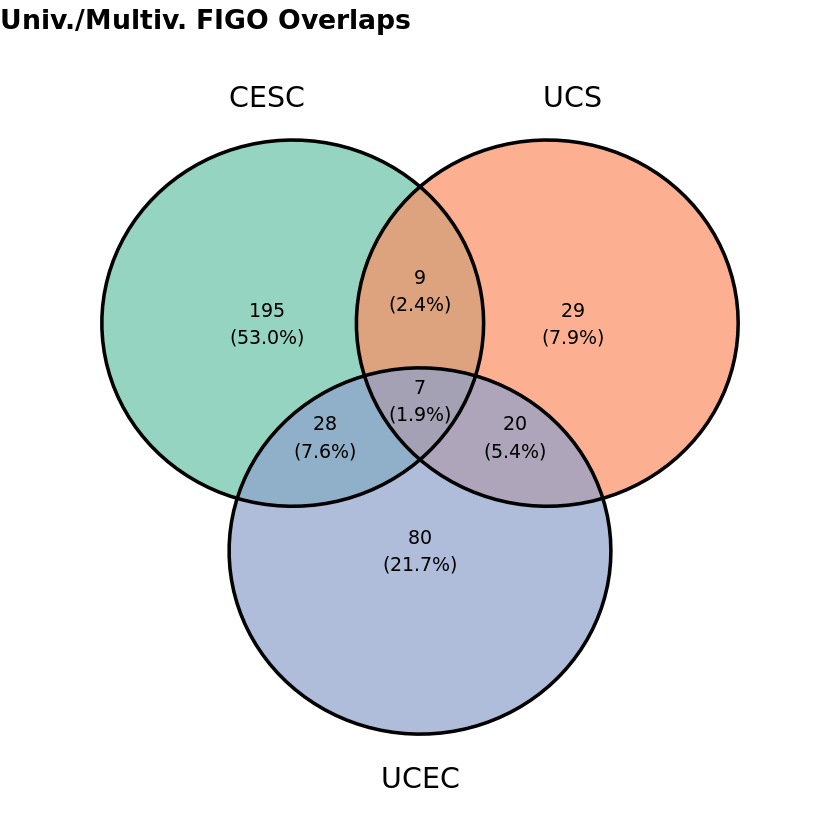

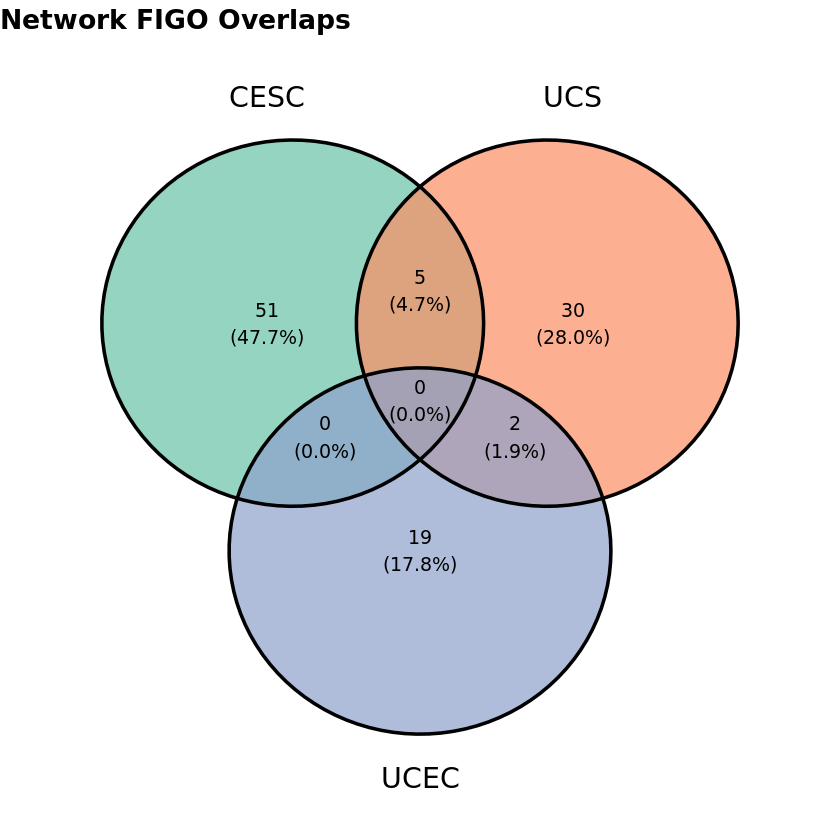

In [48]:
make_inter_venn(venn_df, aes_string(A = "cesc_demg", B = "ucs_demg", C = "ucec_demg"), title = "DEMG Overlaps")
ggsave(filename = paste0(dirs$figures_dir, "/gene_lists/DEMG_inter_overlap.png"), last_plot(), height = fig_h, width = fig_w)
make_inter_venn(venn_df, aes_string(A = "cesc_univar", B = "ucs_univar", C = "ucec_univar"), title = "Univ./Multiv. FIGO Overlaps")
ggsave(filename = paste0(dirs$figures_dir, "/gene_lists/figo_univar_inter_overlap.png"), last_plot(), height = fig_h, width = fig_w)
make_inter_venn(venn_df, aes_string(A = "cesc_network", B = "ucs_network", C = "ucec_network"), title = "Network FIGO Overlaps")
ggsave(filename = paste0(dirs$figures_dir, "/gene_lists/figo_network_inter_overlap.png"), last_plot(), height = fig_h, width = fig_w)